## Possibility of Earth collision

This notebook allows you to calculate the number of comets falling to our Earth. 

We assume there are $10^{12}$ comets in the outer Oort Cloud with diameters larger than 1km and the size distribution we use is: ($D$ is the diameter of Oort Cloud comet.)

$$
N \propto D^{-2}
$$  


The possibility of falling into Earth is calculated by:

$$
P = n \sigma |\Delta{v}_{rel}|T
$$

And $n=\frac{N(\text{in 1 AU in 1 Myr})}{3/4 \pi (1 \text{AU})^3 * 1 \text{Myr}}$, $T=1 \text{Myr}$.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.signal import savgol_filter

In [2]:
def average_vector_difference(r1, r2):
    
    def integrand(theta):
        return np.sqrt(r1**2 + r2**2 - 2 * r1 * r2 * np.cos(theta))
    
    pdf = 1 / np.pi  # Probability density function for theta, uniform in [0, pi]

    result, _ = quad(lambda theta: pdf * integrand(theta), 0, np.pi)
    
    return result


If you need the results of $b=xxx AU$, just load ```result_xxx.txt```.

In [3]:
time = np.linspace(-3.47e6, 0, 10000000)    

result2300 = np.loadtxt('result_2300.txt')         
result_scaled = result2300 / (1e10 + 1e10/5) * 6e12
result_2300 = savgol_filter(result_scaled, 3001, 3) 

result6394 = np.loadtxt('result_6394.txt')          
result_scaled1 = result6394 / (1e10 + 1e10/5) * 6e12
result_6394 = savgol_filter(result_scaled1, 3001, 3) 

result12376 = np.loadtxt('result_12376.txt')          
result_scaled2 = result12376 / (1e10 + 1e10/5) * 6e12
result_12376 = savgol_filter(result_scaled2, 3001, 3) 

Here, we calculate the possibility of collided comet's diameter using $b=2300AU$. If you need other results of different parameters, just change the third line of next cell.

In [4]:
filter = (time > -2.5e6) & (time < -1.5e6)
time_duration = 1e6  # years
result_filtered = result2300[filter]

v_earth  = 2 * np.pi  # AU/yr
V = 4/3 * np.pi * 1**3  # AU^3
R_earth = 6371 * 6.6845871222684e-9  # AU
earth_cross_section = np.pi * R_earth**2 
v_peri_after = 8.88 # AU/year

v_rel_after = average_vector_difference(v_earth, v_peri_after)
n = np.mean(result_filtered) / V
Gama = n * v_rel_after * earth_cross_section
P = Gama * time_duration

N0 = 6e12
R = 10**np.linspace(-1, 2, 100)
N = N0 * R**(-2)
enlarge = N / (1e10 + 1e10/5)
P_enlarge = P * enlarge
R0 = np.sqrt(N0 * P / (1e10 + 1e10/5))
P0 = N0 / (1e10 + 1e10/5) * P

print('The radius of the comet that will fall into the Earth in 1 Myr is', R0, 'km')
print('The number of comets with radius 1 km that will fall into the Earth in 1 Myr is', P0)

The radius of the comet that will fall into the Earth in 1 Myr is 2.2547067156944003 km
The number of comets with radius 1 km that will fall into the Earth in 1 Myr is 5.083702373797429


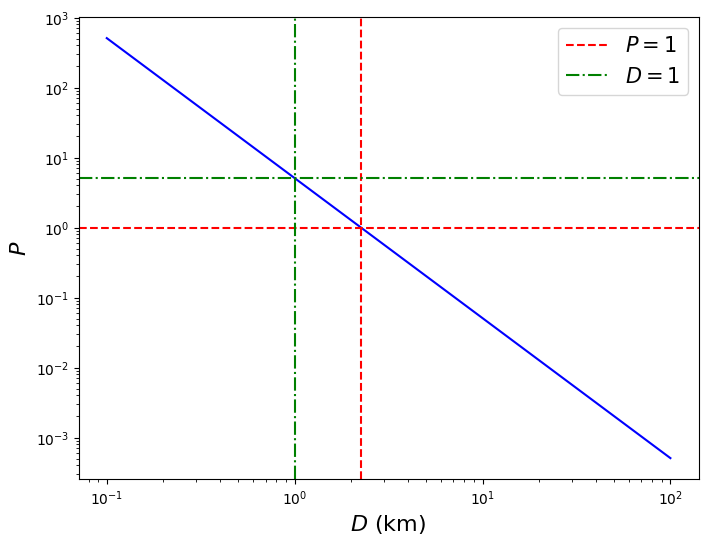

In [5]:
plt.figure(figsize=(8, 6))
plt.plot(R, P_enlarge, color='blue')
plt.axhline(y=1, color='red', linestyle='--', label=r'$P=1$')
plt.axvline(x=R0, color='red', linestyle='--')
plt.axvline(x=1, color='green', linestyle='-.', label=r'$D=1$')
plt.axhline(y=P0, color='green', linestyle='-.')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$D$ (km)', fontsize=16)
plt.ylabel(r'$P$', fontsize=16)
plt.legend(fontsize=15)
plt.show()

Here, we calculate the collision rate of different $b$.

c:\Users\26090\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


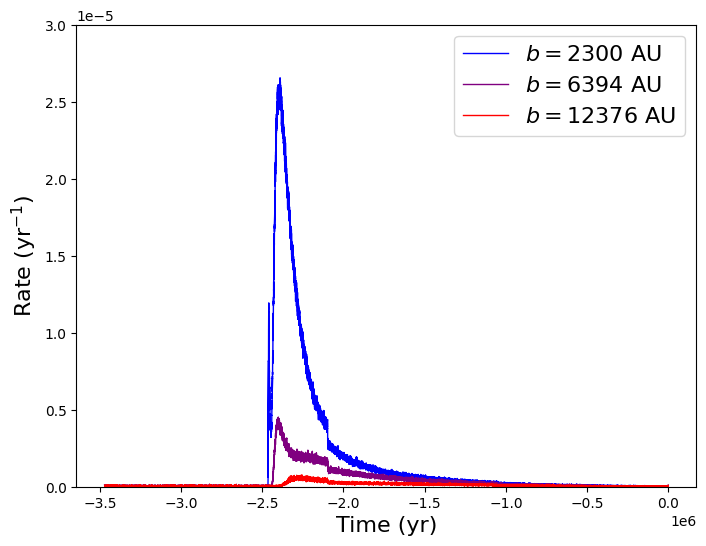

In [6]:
rate = result_2300 / V * v_rel_after * earth_cross_section
rate1 = result_6394 / V * v_rel_after * earth_cross_section
rate2 = result_12376 / V * v_rel_after * earth_cross_section

plt.figure(figsize=(8, 6))
plt.plot(time, rate, color='blue', linewidth=1, label=r'$b=2300~ \mathrm{AU}$')
plt.plot(time, rate1, color='purple', linewidth=1, label=r'$b=6394~ \mathrm{AU}$')
plt.plot(time, rate2, color='red', linewidth=1, label=r'$b=12376~ \mathrm{AU}$')
plt.xlabel('Time (yr)', fontsize=16)
plt.ylabel(r'Rate ($\mathrm{yr}^{-1}$)', fontsize=16)  
plt.legend(fontsize=16)
plt.ylim(0, 3e-5)
plt.show()

Here, the $RR$ (meaning the threshold diameter of collision comets) is calculated by cell 4 using different parameters. All the required data are in ```result_b.txt```files. 

[-2.34818187 10.0559587 ]
0.9928635005553027


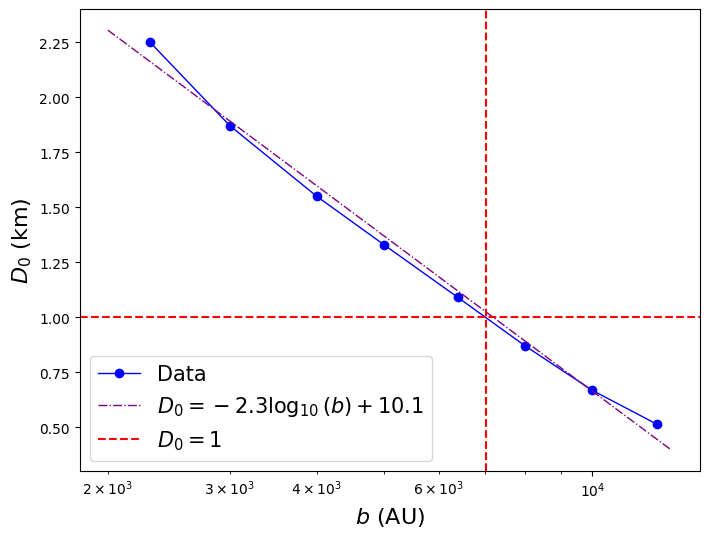

In [7]:
bb = [2300, 3000, 4000, 5000, 6394, 8000, 10000, 12376]
RR = [2.25, 1.87, 1.55, 1.33, 1.09, 0.869, 0.667, 0.514]

# 拟合
def func(x, a, b):
    return a * np.log10(x) + b

from scipy.optimize import curve_fit
popt, pcov = curve_fit(func, bb, RR)
print(popt)
R2 = 1 - np.sum((RR - func(bb, *popt))**2) / np.sum((RR - np.mean(RR))**2)
print(R2)

xx = np.linspace(2000, 13000, 1000)

plt.figure(figsize=(8, 6))
plt.plot(bb, RR, color='blue', linewidth=1, marker='o', linestyle='-', label='Data')
plt.plot(xx, func(xx, *popt), color='purple', linewidth=1, linestyle='-.', label=rf'$D_0 = {popt[0]:.1f} \log_{{10}}(b) + {popt[1]:.1f}$')
plt.axhline(y=1, color='red', linestyle='--', label=r'$D_0=1$')
plt.axvline(x=7030, color='red', linestyle='--')
plt.xlabel('$b$ (AU)', fontsize=16)
plt.ylabel('$D_0$ (km)', fontsize=16)
plt.legend(fontsize=15)
plt.xscale('log')
# plt.yscale('log')
plt.show()